# Clustering on the Diabetes Dataset

This notebook performs a clustering analysis on the diabetes dataset. The goal is to identify sub-groups (clusters) within the patients based on various characteristics related to diabetes. This could reveal interesting patterns and help understand the different risk profiles associated with the disease.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

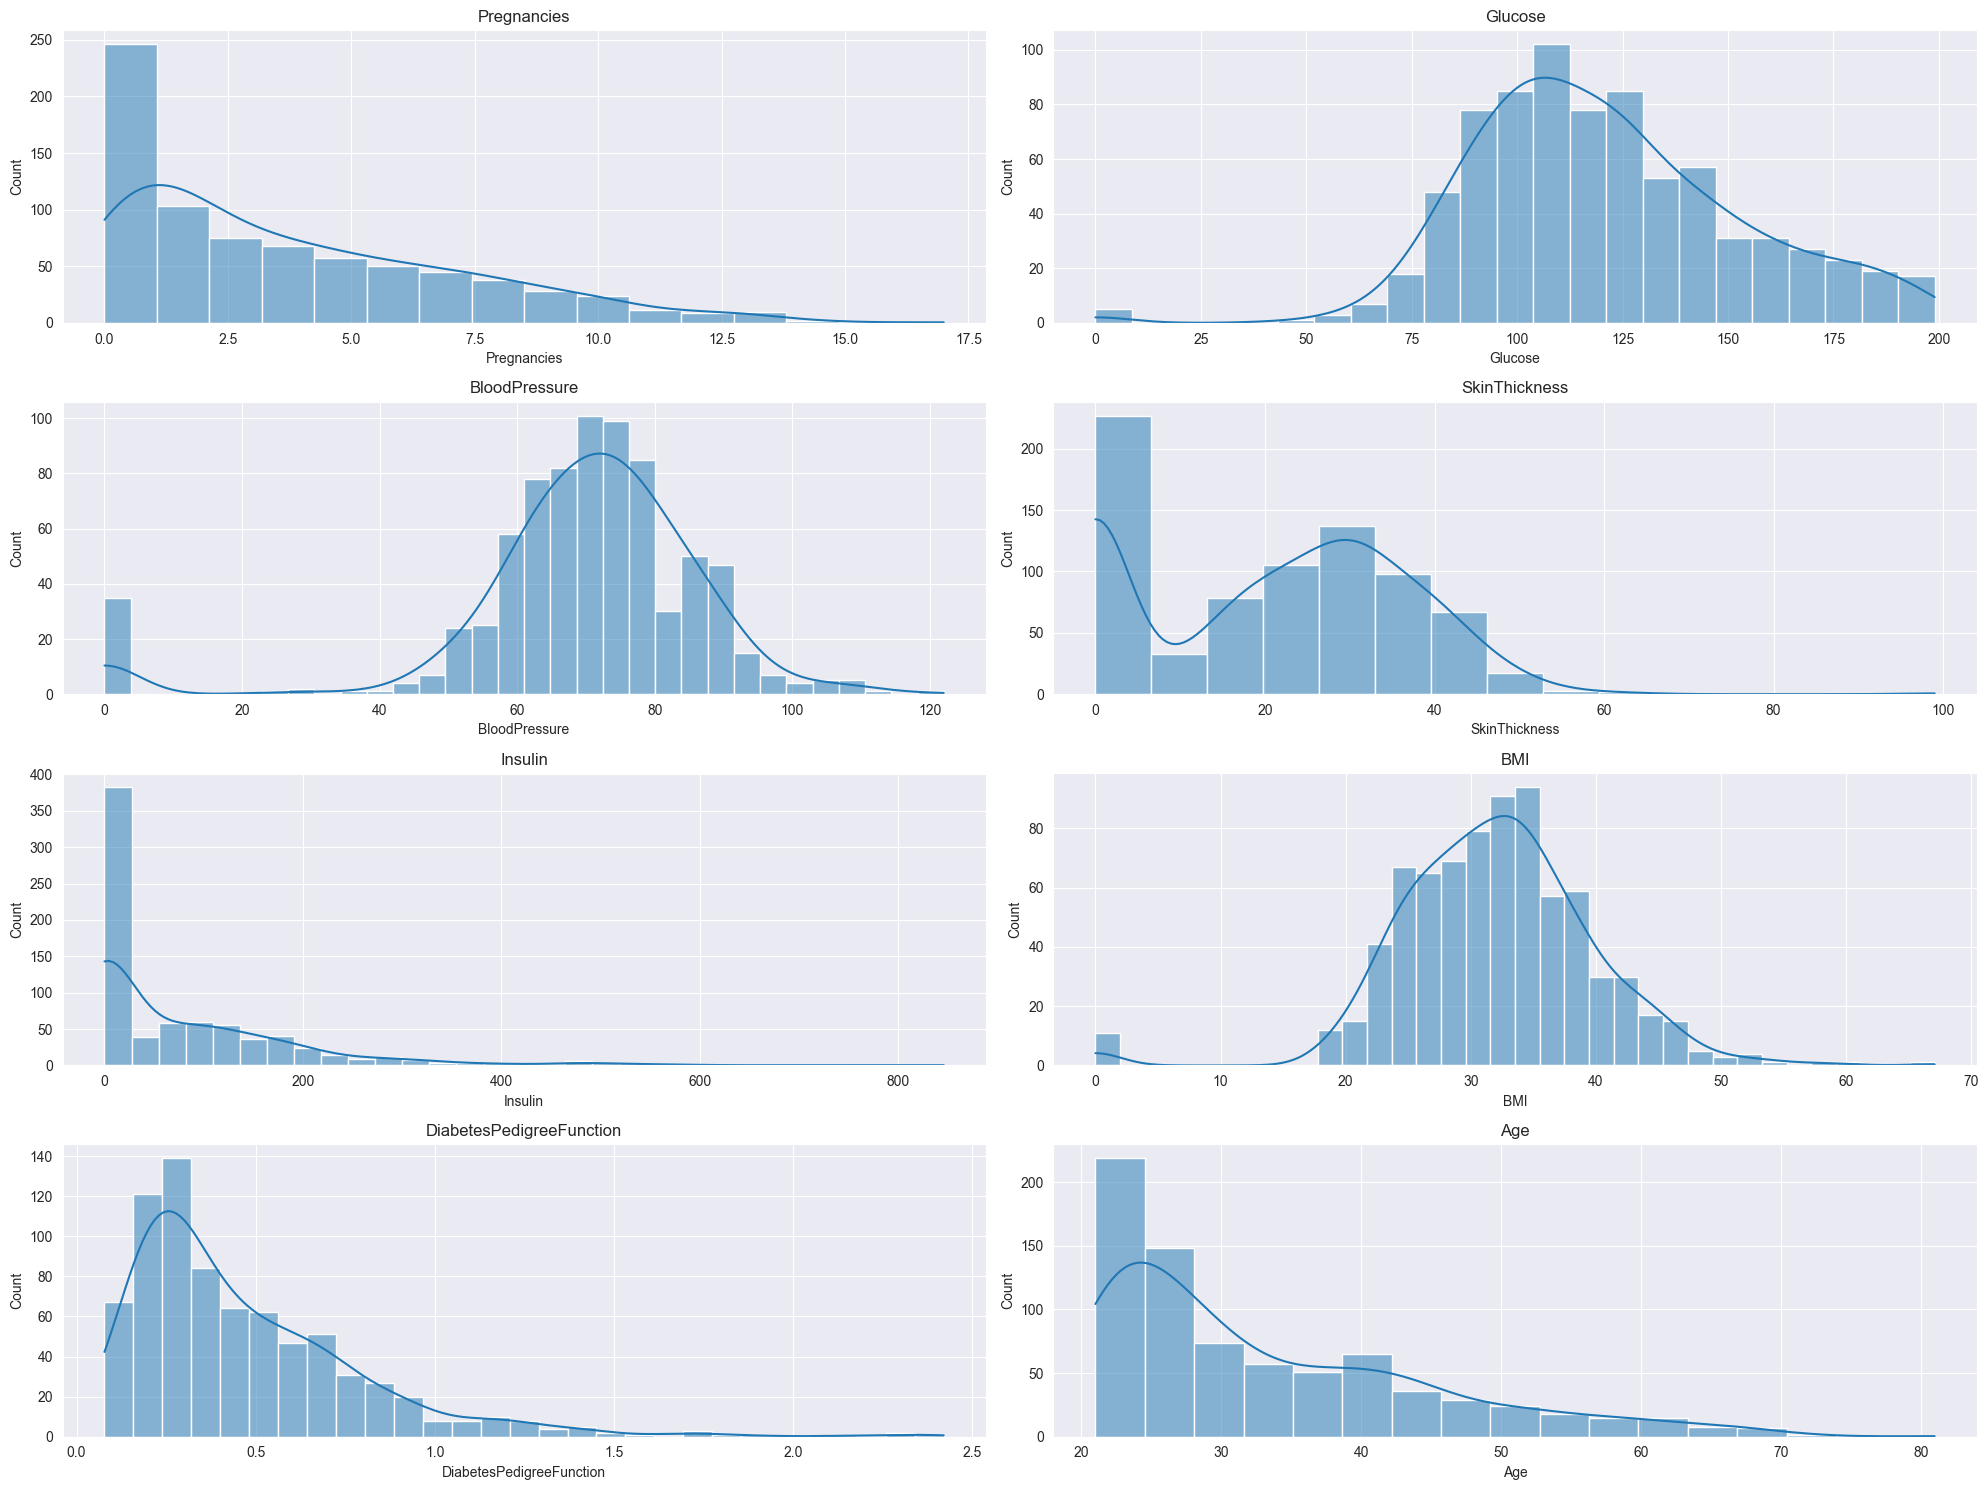

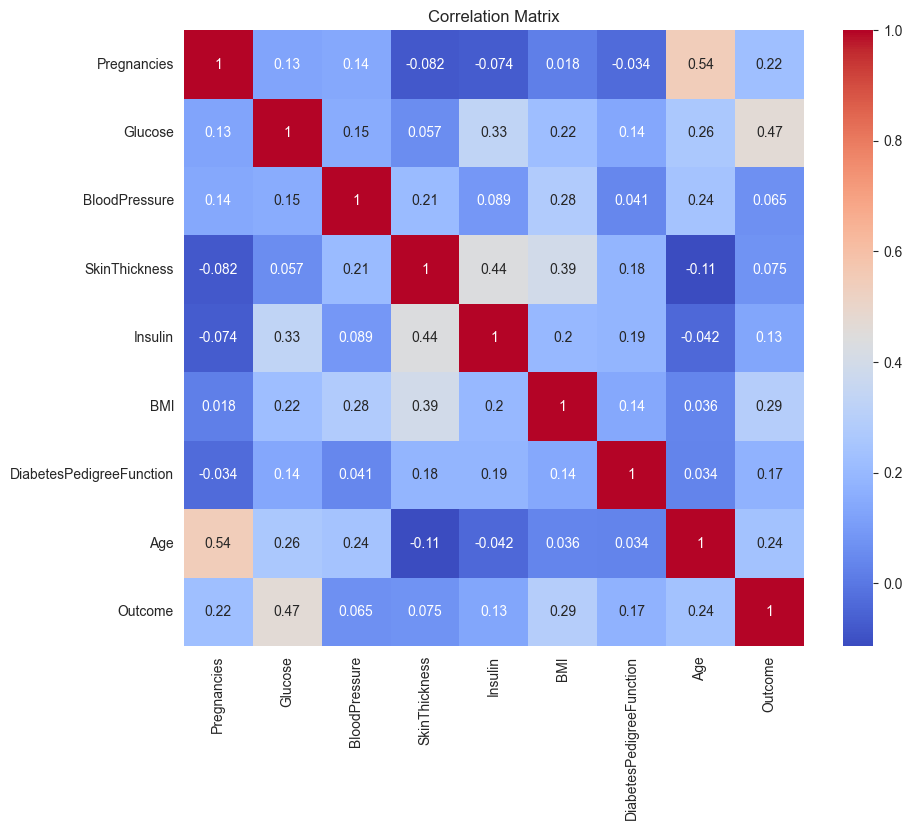

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())

# Descriptive statistics
print(df.describe())

# Visualization of variable distributions
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

Here, we'll prepare the data for clustering, including scaling the features to normalize their ranges.

In [2]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
X = df.drop(['Outcome'], axis=1)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ModuleNotFoundError: No module named 'sklearn'

## Clustering

Applying K-means clustering algorithm to identify clusters.


In [ ]:
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Visualization of the formed clusters
sns.pairplot(df, hue='Cluster')
plt.show()

## Results Interpretation

After applying clustering, we identified 3 distinct clusters within the dataset. By analyzing the average characteristics of each cluster, we can observe notable differences between the groups, which could correspond to different diabetes risk profiles.

It's important to note that these clusters are formed based on available data and do not necessarily represent distinct clinical categories. Further in-depth analysis and clinical validation would be necessary to draw definitive conclusions.


# Conclusion

This clustering analysis on the diabetes dataset has helped identify sub-groups of patients with similar characteristics. These insights could be useful for medical research and for developing personalized prevention strategies. However, further study is necessary to explore the clinical relevance of these clusters.
